In [ ]:
!nvidia-smi

Tue Feb  7 05:28:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.keras import layers,models

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
train_generator=ImageDataGenerator(rescale=1/255,rotation_range=20,shear_range=.2,zoom_range=.2,horizontal_flip=True)

In [ ]:
test_generator=ImageDataGenerator(rescale=1/255)

In [ ]:
train_set=train_generator.flow_from_directory('/content/drive/MyDrive/data/Politician_classification/Train',target_size=(200,200),batch_size=32,class_mode='categorical')

Found 288 images belonging to 4 classes.


In [ ]:
test_set=test_generator.flow_from_directory('/content/drive/MyDrive/data/Politician_classification/Test',target_size=(200,200),batch_size=32,class_mode='categorical')

Found 79 images belonging to 4 classes.


In [ ]:
train_set.class_indices

{'arvind kejriwal': 0,
 'mamta banerjee': 1,
 'narendra modi': 2,
 'rahul gandhi': 3}

In [ ]:
test_set.class_indices

{'arvind kejriwal': 0,
 'mamta banerjee': 1,
 'narendra modi': 2,
 'rahul gandhi': 3}

In [ ]:
model=models.Sequential([
    layers.Conv2D(32,kernel_size=(4,4),input_shape=(200,200,3),activation='relu'),
    layers.MaxPooling2D((2,2),strides=(2,2)),
    layers.Conv2D(64,kernel_size=(4,4),activation='relu'),
    layers.MaxPooling2D((2,2),strides=(2,2)),
    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    layers.Dropout(.3),
    layers.Dense(4,activation='softmax')

])

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 197, 197, 32)      1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 141376)            0         
                                                                 
 dense (Dense)               (None, 100)               1

In [ ]:
%%timeit -n1 -r1
model.fit(train_set,epochs=50)

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/50
9/9 [==============================] - 15s 1s/step - loss: 5.4321 - accuracy: 0.2396
Epoch 2/50
9/9 [==============================] - 6s 658ms/step - loss: 1.3700 - accuracy: 0.3368
Epoch 3/50
9/9 [==============================] - 7s 828ms/step - loss: 1.3223 - accuracy: 0.3750
Epoch 4/50
9/9 [==============================] - 6s 647ms/step - loss: 1.3038 - accuracy: 0.4271
Epoch 5/50
9/9 [==============================] - 7s 820ms/step - loss: 1.2364 - accuracy: 0.4444
Epoch 6/50
9/9 [==============================] - 6s 657ms/step - loss: 1.1065 - accuracy: 0.5486
Epoch 7/50
9/9 [==============================] - 7s 804ms/step - loss: 1.1050 - accuracy: 0.5451
Epoch 8/50
9/9 [==============================] - 6s 665ms/step - loss: 1.0033 - accuracy: 0.6458
Epoch 9/50
9/9 [==============================] - 7s 813ms/step - loss: 0.9872 - accuracy: 0.5972
Epoch 10/50
9/9 [==============================] - 6s 683ms/step - loss: 1.0042 - accuracy: 0.5417
Epoch 11/50
9/9 [====

In [ ]:
def pred_image(image_path,classifier):
  pic=image.load_img(image_path,target_size=(200,200))
  plt.imshow(pic)
  pred_array=image.img_to_array(pic)
  pred_scale=pred_array/255
  pred_new=np.expand_dims(pred_scale,axis=0)
  result=classifier.predict(pred_new)
  print('propability',result.round(2))
  if result[0][0]>0.5:
    prediction='Arvind Kejriwal'
  elif result[0][1]>.5:
    prediction='Mamta Banerjee'
  elif result[0][2]>.5:
    prediction='Narednra Modi'
  else:
    prediction='Rahul Gandhi'
  print("Prediction of image is ",prediction)

1/1 [==============================] - 0s 19ms/step
propability [[0. 1. 0. 0.]]
Prediction of image is  Mamta Banerjee


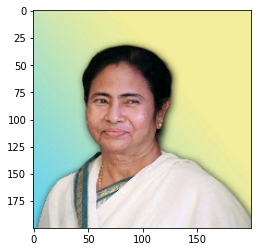

In [ ]:
pred_image('/content/drive/MyDrive/data/Politician_classification/Test/mamta banerjee/Mamta-Banerjee (1).png',model)

1/1 [==============================] - 0s 27ms/step
propability [[0. 0. 1. 0.]]
Prediction of image is  Narednra Modi


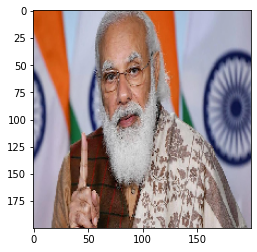

In [ ]:
pred_image('/content/drive/MyDrive/data/Politician_classification/Test/narendra modi/PM_Modi_PIB_5_1200x768.jpeg',model)

1/1 [==============================] - 0s 26ms/step
propability [[0.01 0.08 0.   0.91]]
Prediction of image is  Rahul Gandhi


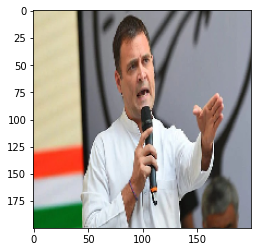

In [ ]:
pred_image('/content/drive/MyDrive/data/Politician_classification/Test/rahul gandhi/IMAGE_1662518224.jpg',model)

1/1 [==============================] - 0s 30ms/step
propability [[1. 0. 0. 0.]]
Prediction of image is  Arvind Kejriwal


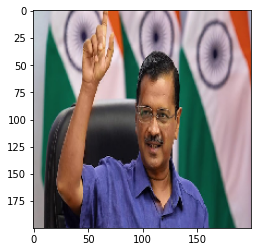

In [ ]:
pred_image('/content/drive/MyDrive/data/Politician_classification/Test/arvind kejriwal/kejriwal-sixteen_nine.jpg',model)

1/1 [==============================] - 0s 21ms/step
propability [[0. 0. 1. 0.]]
Prediction of image is  Narednra Modi


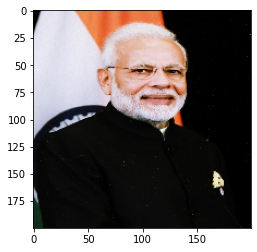

In [ ]:
pred_image('/content/drive/MyDrive/data/Politician_classification/Test/narendra modi/Shri_Narendra_Modi.jpg',model)